<a href="https://colab.research.google.com/github/kalravm41/project122/blob/main/project122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

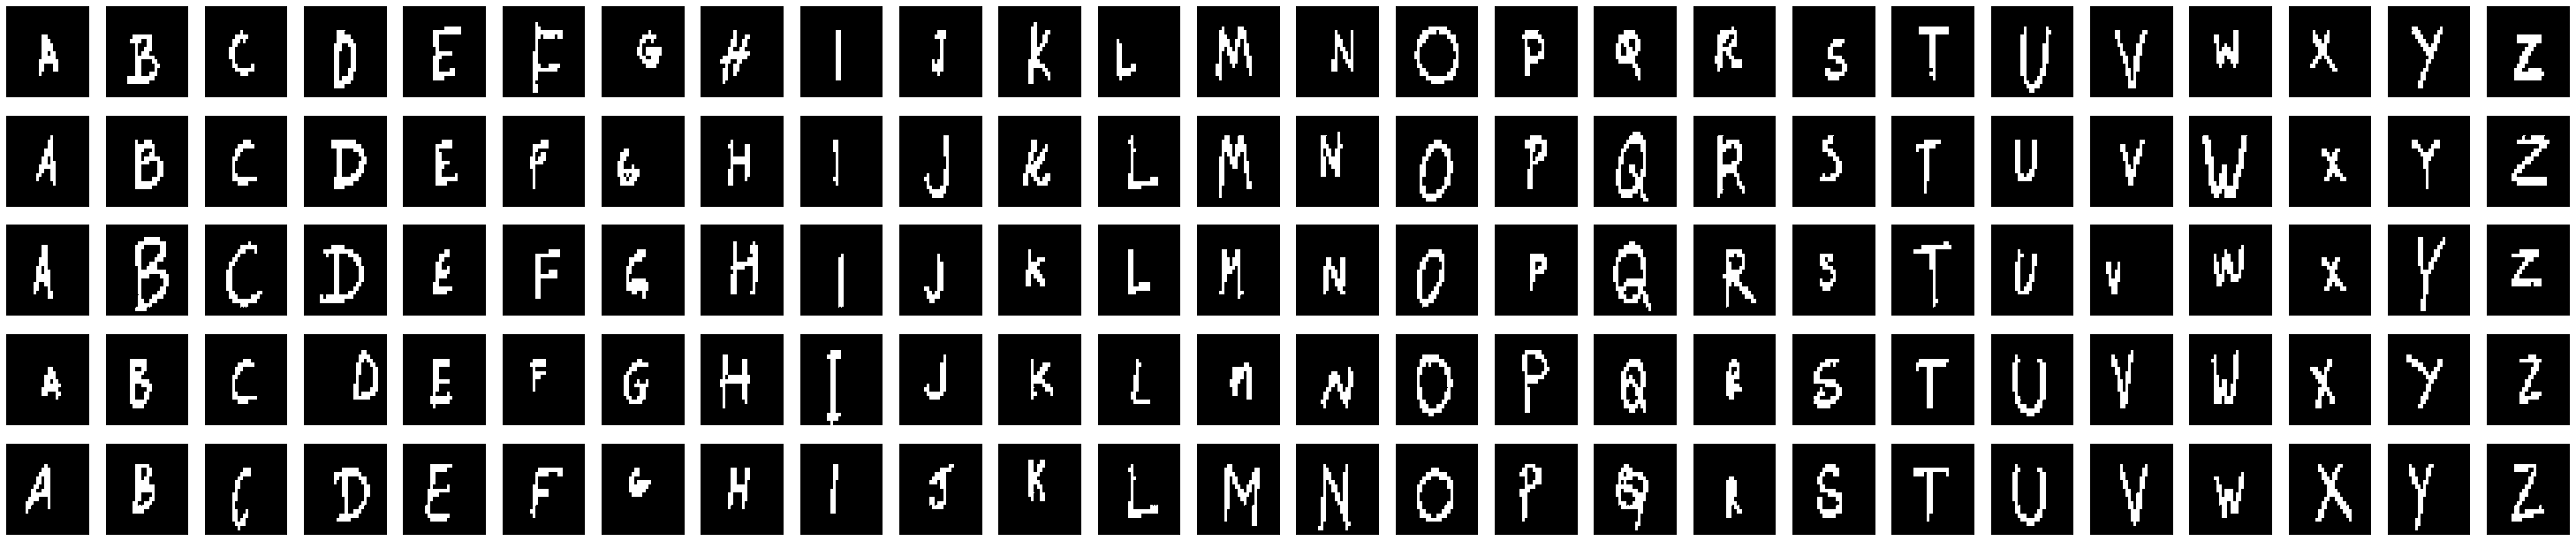

In [4]:
import cv2
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml as foml
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import pandas as pd

X = np.load('image.npz')['arr_0']
Y = pd.read_csv('labels.csv')['labels']

classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
nclasses = len(classes)

samples_perclass = 5
fig = plt.figure(figsize= (nclasses*2, (1+samples_perclass*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(Y == cls)
  idxs = np.random.choice(idxs, samples_perclass, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_perclass, nclasses, plt_idx);
    p = sb.heatmap(np.reshape(X[idx], (22,30)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

In [5]:
x_train,x_test,y_train,y_test = tts(X,Y,test_size= 2500, train_size= 7500, random_state= 0)

x_trainScaled= x_train/255.0
x_testScaled= x_test/255.0

lr = LogisticRegression(solver = 'saga', multi_class= 'multinomial').fit(x_trainScaled, y_train)

y_predict = lr.predict(x_testScaled)

accuracy = accuracy_score(y_test, y_predict)

print(f'accuracy: {accuracy}')

accuracy: 0.992


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


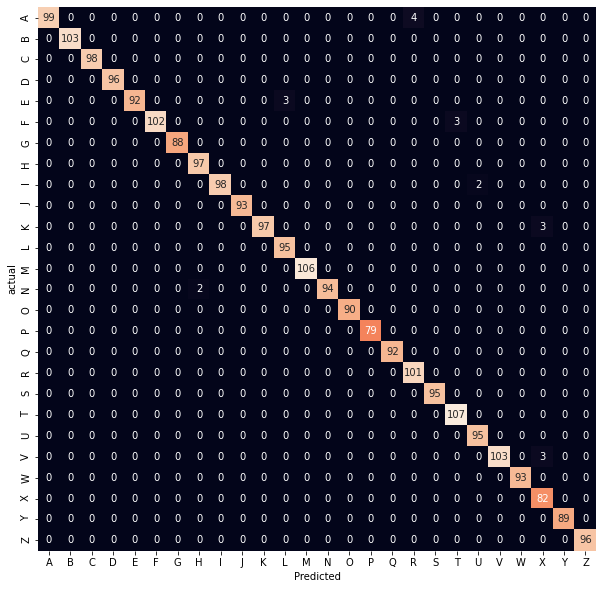

In [6]:
cm = pd.crosstab(y_test, y_predict, rownames= ['actual'], colnames= ['Predicted'])

p = plt.figure(figsize= (10,10))
p = sb.heatmap(cm, annot= True, fmt= 'd', cbar= False)